In [2]:
#!/usr/bin/env python
# coding=utf-8
# author: chicho
# running: python trees.py
# filename : trees.py
from math import log

def createDataSet():
    dataSet = [[1,1,'yes'],
              [1,1,'yes'],
              [1,0,'no'],
              [0,1,'no'],
              [0,1,'no']]


    labels = ['no surfacing','flippers']

    return dataSet, labels


def calcShannonEnt(dataSet):
    countDataSet = len(dataSet)
    labelCounts={}
    for featVec in dataSet:
        currentLabel=featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
        labelCounts[currentLabel] += 1

    print labelCounts

    shannonEnt = 0.0

    for key in labelCounts:
        prob = float(labelCounts[key])/countDataSet
        shannonEnt -= prob * log(prob,2)


    return shannonEnt


def splitDataSet(dataSet,axis,value):
    retDataSet = []

    for featVec in dataSet:
        if featVec[axis] == value:
            reduceFeatVec = featVec[:axis]
            reduceFeatVec.extend(featVec[axis+1:])
            retDataSet.append(reduceFeatVec)

    return retDataSet


def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0])-1
    baseEntropy = calcShannonEnt(dataSet)
    bestInfoGain =0.0
    bestFeature = -1

    for i in range(numFeatures):
        featList = [sample[i] for sample in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet,i,value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)

        infoGain = baseEntropy - newEntropy

        if(infoGain > bestInfoGain):
            bestInfoGain = infoGain
            bestFeature = i

    return bestFeature

myDat,labels = createDataSet()
print myDat
print labels
k = chooseBestFeatureToSplit(myDat)
print k

[[1, 1, 'yes'], [1, 1, 'yes'], [1, 0, 'no'], [0, 1, 'no'], [0, 1, 'no']]
['no surfacing', 'flippers']
{'yes': 2, 'no': 3}
{'no': 2}
{'yes': 2, 'no': 1}
{'no': 1}
{'yes': 2, 'no': 2}
0


     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa
<type 'numpy.float64'>
特征： 花萼长度  +  花萼宽度
	训练集准确率: 85.7143%
	测试集准确率: 71.1111%

特征： 花萼长度  +  花瓣长度
	训练集准确率: 96.1905%
	测试集准确率: 91.1111%

特征： 花萼长度  +  花瓣宽度
	训练集准确率: 96.1905%
	测试集准确率: 86.6667%

特征： 花萼宽度  +  花瓣长度
	训练集准确率: 97.1429%
	测试集准确率: 95.5556%

特征： 花萼宽度  +  花瓣宽度
	训练集准确率: 96.1905%
	测试集准确率: 95.5556%

特征： 花瓣长度  +  花瓣宽度
	训练集准确率: 98.0952%
	测试集准确率: 97.7778%



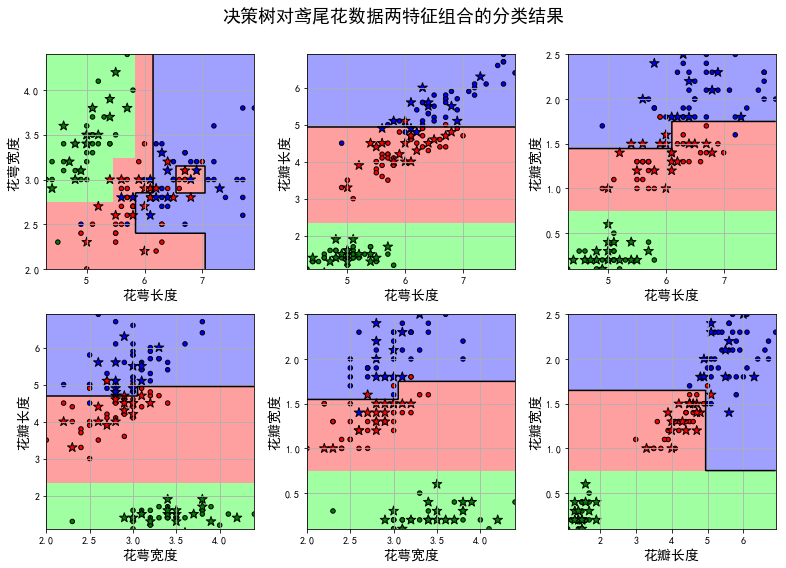

In [5]:
#!/usr/bin/python
# -*- coding:utf-8 -*-

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

if __name__ == "__main__":
    mpl.rcParams['font.sans-serif'] = [u'SimHei']
    mpl.rcParams['axes.unicode_minus'] = False

    iris_feature = u'花萼长度', u'花萼宽度', u'花瓣长度', u'花瓣宽度'
    path = '..\\9.Regression\\iris.data'  # 数据文件路径
    data = pd.read_csv(path, header=None)
    print data.head(5)
    print type(data[0][0])
    x_prime = data[range(4)]
    y = pd.Categorical(data[4]).codes
    x_prime_train, x_prime_test, y_train, y_test = train_test_split(x_prime, y, train_size=0.7, random_state=0)

    feature_pairs = [[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]
    plt.figure(figsize=(11, 8), facecolor='#FFFFFF')
    for i, pair in enumerate(feature_pairs):
        # 准备数据
        x_train = x_prime_train[pair]
        x_test = x_prime_test[pair]

        # 决策树学习
        model = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=3)
        model.fit(x_train, y_train)

        N, M = 500, 500  # 横纵各采样多少个值
        x1_min, x2_min = x_train.min()
        x1_max, x2_max = x_train.max()
        t1 = np.linspace(x1_min, x1_max, N)
        t2 = np.linspace(x2_min, x2_max, M)
        x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
        x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点

        # 训练集上的预测结果
        y_train_pred = model.predict(x_train)
        acc_train = accuracy_score(y_train, y_train_pred)
        y_test_pred = model.predict(x_test)
        acc_test = accuracy_score(y_test, y_test_pred)
        print '特征：', iris_feature[pair[0]], ' + ', iris_feature[pair[1]]
        print '\t训练集准确率: %.4f%%' % (100*acc_train)
        print '\t测试集准确率: %.4f%%\n' % (100*acc_test)

        cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
        cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
        y_hat = model.predict(x_show)
        y_hat = y_hat.reshape(x1.shape)
        plt.subplot(2, 3, i+1)
        plt.contour(x1, x2, y_hat, colors='k', levels=[0, 1], antialiased=True)
        plt.pcolormesh(x1, x2, y_hat, cmap=cm_light)  # 预测值
        plt.scatter(x_train[pair[0]], x_train[pair[1]], c=y_train, s=20, edgecolors='k', cmap=cm_dark, label=u'训练集')
        plt.scatter(x_test[pair[0]], x_test[pair[1]], c=y_test, s=100, marker='*', edgecolors='k', cmap=cm_dark, label=u'测试集')
        plt.xlabel(iris_feature[pair[0]], fontsize=14)
        plt.ylabel(iris_feature[pair[1]], fontsize=14)
        # plt.legend(loc='upper right', fancybox=True, framealpha=0.3)
        plt.xlim(x1_min, x1_max)
        plt.ylim(x2_min, x2_max)
        plt.grid(b=True)
    plt.suptitle(u'决策树对鸢尾花数据两特征组合的分类结果', fontsize=18)
    plt.tight_layout(1, rect=(0, 0, 1, 0.92))    # (left, bottom, right, top)
    plt.show()